In [137]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import h5py


In [46]:
import import_ipynb
from Normalization import Normalizer
from ActivationFunctions import ActivationFunctions
from LossFunctions import LossFunctions

## Import data

In [101]:
trainFilename = "./data/train_catvnoncat.h5"
testFilename = "./data/test_catvnoncat.h5"

In [102]:
def load_dataset():
    train_dataset = h5py.File(trainFilename, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(testFilename, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [103]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


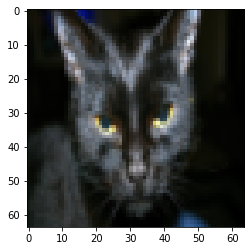

In [104]:
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

## Data formalization

In [105]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = test_set_x_orig.shape[1]

In [106]:
#Flatten the vectors into 1D ones

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [107]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

## Logistic Regression Class

In [168]:
class LogisticRegression:
    activationFunctions = ActivationFunctions()
    normalizer = Normalizer()
    lossFunctions = LossFunctions()
    default_learning_rate = 0.5
    default_num_iterations = 2000
    w = []
    b = 0
    
    def _initialize_with_zeros(self, dim):
        """
        This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0
        """

        ### START CODE HERE ### (≈ 1 line of code)
        w = np.zeros((dim,1))
        b = 0
        ### END CODE HERE ###

        assert(w.shape == (dim, 1))
        assert(isinstance(b, float) or isinstance(b, int))

        return w, b

    def _propagate(self, w, b, X, Y):
        """
            Forward Propagation
        """

        m = X.shape[1]

        # FORWARD PROPAGATION (FROM X TO COST)
        A = self.activationFunctions.sigmoid(np.dot(w.T, X) + b)                    # compute activation
        cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))           # compute cost

        # BACKWARD PROPAGATION 
        dw = (1 / m) * np.dot(X, (A - Y).T)
        db = (1 / m) * np.sum(A - Y)

        assert(dw.shape == w.shape)
        assert(db.dtype == float)
        cost = np.squeeze(cost)
        assert(cost.shape == ())

        grads = {"dw": dw,
                 "db": db}

        return grads, cost
    
    def _optimize(self, w, b, X, Y, num_iterations, learning_rate, print_cost = False):
        """
        This function optimizes w and b by running a gradient descent algorithm
        """
        costs = []

        for i in range(num_iterations):
            # Cost and gradient calculation
            grads, cost = self._propagate(w, b, X, Y)

            # Retrieve derivatives from grads
            dw = grads["dw"]
            db = grads["db"]

            # update rule (≈ 2 lines of code)
            w = w - learning_rate * dw
            b = b - learning_rate * db

            # Record the costs
            if i % 100 == 0:
                costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))

        params = {"w": w,
                  "b": b}

        grads = {"dw": dw,
                 "db": db}

        return params, grads, costs
    
    def _predict(self, w, b, X, threshold = 0.5):
        '''
        Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
        '''

        m = X.shape[1]
        Y_prediction = np.zeros((1,m))
        w = w.reshape(X.shape[0], 1)

        # Compute vector "A" predicting the probabilities of a cat being present in the picture
        A = activationFunctions.sigmoid(np.dot(w.T, X) + b)

        for i in range(A.shape[1]):

            # Convert probabilities A[0,i] to actual predictions p[0,i]
            Y_prediction[0,i] = 0 if A[0,i] < threshold else 1

        assert(Y_prediction.shape == (1, m))

        return Y_prediction
    
    def train(self, X_train, Y_train, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
        """
        Builds the logistic regression model by calling the function you've implemented previously
        """

        # initialize parameters with zeros
        w, b = initialize_with_zeros(X_train.shape[0] )

        # Gradient descent 
        parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

        # Retrieve parameters w and b from dictionary "parameters"
        self.w = parameters["w"]
        self.b = parameters["b"]
        
        Y_predict = _predict(self.w, self.b, X_train)
        print("Accuracy: {} %".format(100 - np.mean(np.abs(Y_predict - Y_train)) * 100))

    def get_metrics(self, X, Y, show_results = False):
        
        Y_predict = _predict(self.w, self.b, X)

        # Print train/test Errors
        if show_results: print("Accuracy: {} %".format(100 - np.mean(np.abs(Y_predict - Y)) * 100))
        return {"Accuracy": (1 - np.mean(np.abs(Y_predict - Y)))}
    
    
    def predict(self, X, threshold = 0.5):
        return _predict(self.w, self.b, X, threshold)
    
    
#     def train_with_gridsearch(self, X_train, Y_train, grid_search, keepAll = False):
        
#         if "learning_rate" not in grid_search.keys(): grid_search["learning_rate"] = self.default_learning_rate
#         if "num_iterations" not in grid_search.keys(): grid_search["num_iterations"] = self.default_num_iterations

#         size_train_set = int(len(X_train) * .80)
#         X_train_set = X_train[:size_train_set]
#         Y_train_set = Y_train[:size_train_set]
#         X_validation = X_train[size_train_set:]
#         Y_validation = Y_train[size_train_set:]

#         models = []
#         for i in it.product(*(grid_search[i] for i in sorted(grid_search))):
#             w, b = initialize_with_zeros(X_train_set.shape[0] )
#             # Gradient descent 
#             parameters, grads, costs = self._optimize(w, b, X_train_set, Y_train_set, i[1], i[0], print_cost = False)

#             metrics = self.get_metrics(X_validation, Y_validation)
#             if keepAll:
#                 models.append({"w":w, "b":b, "metrics":metrics})
#             else:
#                 if metrics["Accuracy"] > models[0]["Accuracy"]:
#                     models = [{"w":w, "b":b, "metrics":metrics}]
        
#         return models
    

In [170]:
l = LogisticRegression()
l.train(train_set_x, train_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Accuracy: 99.04306220095694 %


In [171]:
#Test 
l.get_metrics(test_set_x, test_set_y)

{'Accuracy': 0.7}

In [183]:
gridSearch = {'num_iterations':[1000,2000,5000],
              'learning_rate':[0.01, 0.001, 0.0001]}
keepAll = False

# l.train_with_gridsearch(train_set_x, test_set_y, gridSearch, keepAll)


## Quick check

y = 0, you predicted that it is a "non-cat" picture.


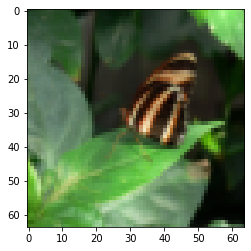

In [123]:
# Example of a picture that was wrongly classified.
index = 5
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

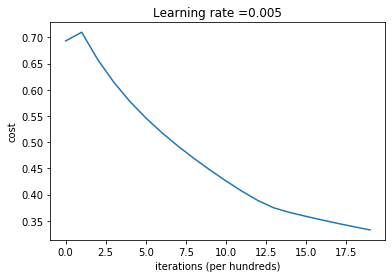

In [124]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



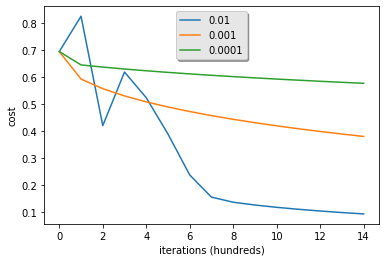

In [125]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()